In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,MaxPooling2D,Dense,Flatten


In [3]:
X_train=np.loadtxt('input.csv',delimiter=',')
X_test=np.loadtxt('input_test.csv',delimiter=',')

Y_train=np.loadtxt('labels.csv',delimiter=',')
Y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [6]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

In [7]:
print("X_train shape : ",X_train.shape)
print("X_test shape : ",X_test.shape)
print("Y_train shape : ",Y_train.shape)
print("Y_test shape : ",Y_test.shape)

X_train shape :  (2000, 100, 100, 3)
X_test shape :  (400, 100, 100, 3)
Y_train shape :  (2000, 1)
Y_test shape :  (400, 1)


In [8]:
X_train[1,:]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [9]:
X_train=X_train/255.0
X_test=X_test/255.0
Y_train=Y_train/255.0
Y_test=Y_test/255.0

In [11]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [14]:
import matplotlib.pyplot as plt
import random

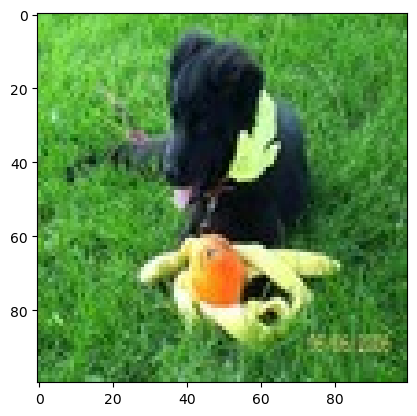

In [15]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [17]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),#tanh can be used
    Dense(1,activation='sigmoid')#binary class classification that is why sigmoid is used
    
])

In [23]:
import keras
opt=keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
#lets go with adam

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])#other entropy for diff type
#optimsr can be stochastic gradient descendernt

model.fit(X_train,Y_train,epochs=10,batch_size=64)

In [31]:
model.fit(X_train,Y_train,epochs=50,batch_size=64)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.4939 - loss: 0.0141
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.4975 - loss: 0.0139
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.4850 - loss: 0.0142 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.5032 - loss: 0.0137
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.4839 - loss: 0.0142 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.4907 - loss: 0.0140
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.4953 - loss: 0.0138 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.4901 - loss: 0.0139
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.4951 - loss: 0.0138 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.4835 - loss: 0.0141
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.4979 - loss: 0.0136
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - a

In [33]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7916 - loss: 0.0069  


[0.015646660700440407, 0.5]

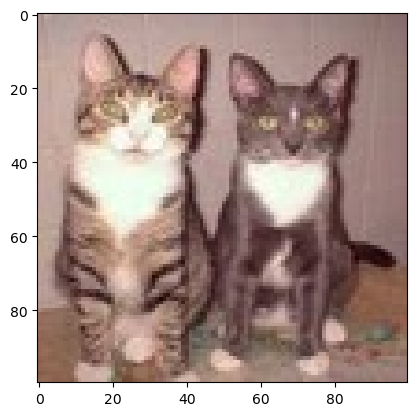

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
our model predict it is a Dog


In [40]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5
if(y_pred==0):
    pred='Dog'
else:
    pred="cat"
print("our model predict it is a",pred)